# Install and Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import folium

warnings.filterwarnings('ignore')

# Load data

In [2]:
df = pd.read_csv('../unesco-challenge-corals-distribution/dataset/data.csv')
df.shape

(2471, 10)

# Descriptive Analysis

In [3]:
df.head()

,name,salinity,January_temp,June_temp,area,latitude,longitude,type of sea,corals,silt/sulfide
0,Adriatic Sea,38.298527,15.658799,20.855299,138000,43,15,2,1,0
1,Adriatic Sea,38.304909,16.297098,19.501200,138000,43,15,2,1,0
2,Adriatic Sea,38.462040,16.251598,19.028500,138000,43,15,2,1,0
3,Adriatic Sea,38.121601,15.709500,22.882999,138000,43,15,2,1,0
4,Adriatic Sea,38.519196,15.733400,21.824799,138000,43,15,2,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2471 non-null   object 
 1   salinity      2471 non-null   float64
 2   January_temp  2471 non-null   float64
 3   June_temp     2471 non-null   float64
 4   area          2471 non-null   int64  
 5   latitude      2471 non-null   int64  
 6   longitude     2471 non-null   int64  
 7   type of sea   2471 non-null   int64  
 8   corals        2471 non-null   int64  
 9   silt/sulfide  2471 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 193.2+ KB


## Numerical features

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salinity,2471.0,3.281795e+01,6.620384e+00,5.933204,32.874348,34.191502,3.613582e+01,4.000000e+01
January_temp,2471.0,1.792853e+01,1.111731e+01,-1.899994,7.890149,19.497200,2.822470e+01,3.076350e+01
June_temp,2471.0,2.153131e+01,1.014451e+01,-1.899994,19.000000,24.600000,2.961455e+01,3.230000e+01
area,2471.0,1.006533e+06,1.207700e+06,11500.000000,280000.000000,610000.000000,1.150000e+06,5.695000e+06
latitude,2471.0,1.778066e+01,3.410340e+01,-75.000000,-5.000000,22.000000,4.000000e+01,7.700000e+01
longitude,2471.0,7.685714e+01,5.499335e+01,-178.000000,28.000000,65.000000,1.250000e+02,1.630000e+02
type of sea,2471.0,2.681505e+00,5.075721e-01,1.000000,2.000000,3.000000,3.000000e+00,4.000000e+00
corals,2471.0,8.530959e-01,3.540819e-01,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
silt/sulfide,2471.0,4.937272e-02,2.258376e-01,0.000000,0.000000,0.000000,0.000000e+00,2.000000e+00


## Categorical features

In [6]:
df.describe(include=object).T

,count,unique,top,freq
name,2471,70,Adriatic Sea,49


## NaN analysis

In [7]:
df.isnull().sum()

name            0
salinity        0
January_temp    0
June_temp       0
area            0
latitude        0
longitude       0
type of sea     0
corals          0
silt/sulfide    0
dtype: int64

## Duplicated values

In [8]:
print('Total of duplicated values:', df[df.duplicated()].shape[0])

Total of duplicated values: 0


# Exploratory Data Analysis

## Number of seas

In [9]:
print('Number of seas in dataset:', df['name'].nunique())

Number of seas in dataset: 70


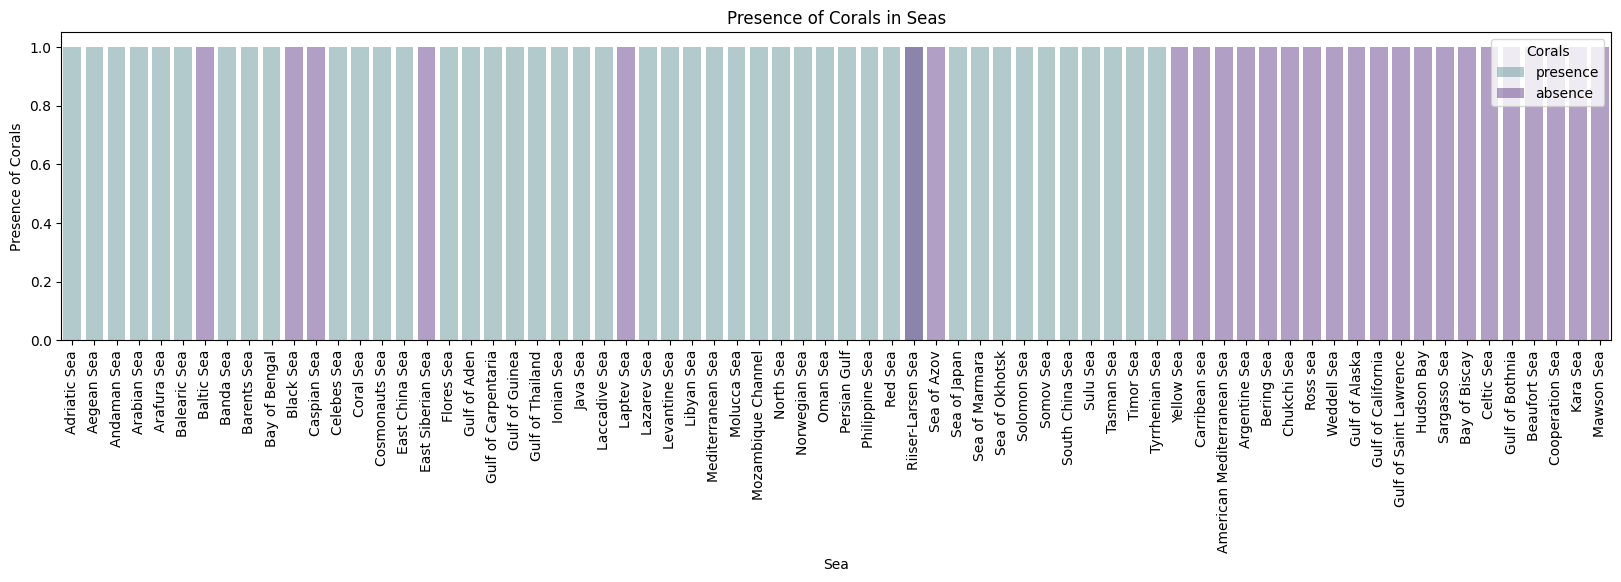

In [10]:
plt.figure(figsize=(20, 4))
sns.barplot(x='name', y=1, data=df.assign(Corals=df['corals'].map({0:'absence',1:'presence'})), hue='Corals', dodge=False, palette=({'presence':'cadetblue','absence':'rebeccapurple'}), alpha=0.5)

plt.xlabel('Sea')
plt.ylabel('Presence of Corals')
plt.title('Presence of Corals in Seas')
plt.xticks(rotation=90)

plt.show()

In [11]:
seas_corals = df.groupby('name')['corals'].nunique()
seas_corals[seas_corals > 1].reset_index()

,name,corals
0,Riiser-Larsen Sea,2


The Riiser-Larsen Sea is a marginal sea of the Southern Ocean and the only sea among the 70 in the dataset that has a presence/absence of corals.

In [12]:
df[df['name'].eq('Riiser-Larsen Sea')]

,name,salinity,January_temp,June_temp,area,latitude,longitude,type of sea,corals,silt/sulfide
1862,Riiser-Larsen Sea,33.884373,-0.4713,-1.899994,1138000,-68,22,3,1,0
2470,Riiser-Larsen Sea,33.990000,0.1600,-1.890000,1138000,-68,22,3,0,2


In [13]:
round(df['silt/sulfide'].value_counts(normalize=True)*100,2)

0    95.27
1     4.53
2     0.20
Name: silt/sulfide, dtype: float64

Based on the data above, the only significant difference leading to the absence of corals in this sea is the value 2 for silt/sulfide. A hypothesis that still needs to be validated is whether the presence of silt/sulfide is equivalent to the absence of corals.

The data dictionary indicates that:

- 0 equals absence of silt/sulfide
- 1 equals presence of silt/sulfide

 I am assuming that value "2" means no clear information. Since this represents 0.20% of the total, these values will be dropped.

In [14]:
df[df['silt/sulfide'].eq(2)]

,name,salinity,January_temp,June_temp,area,latitude,longitude,type of sea,corals,silt/sulfide
2466,Beaufort Sea,30.00,-1.80,-1.40,476000,72,-137,3,0,2
2467,Cooperation Sea,33.62,0.12,-1.89,258000,-65,72,3,0,2
2468,Kara Sea,27.76,-1.89,6.90,926000,77,77,3,0,2
2469,Mawson Sea,33.98,-1.50,-1.89,333000,-65,105,3,0,2
2470,Riiser-Larsen Sea,33.99,0.16,-1.89,1138000,-68,22,3,0,2


In [15]:
print('Dataframe shape before drop value "2" of silt/sulfide:', df.shape[0])

df = df[~df['silt/sulfide'].eq(2)]

print('Dataframe shape after drop value "2" of silt/sulfide:', df.shape[0])

Dataframe shape before drop value "2" of silt/sulfide: 2471
Dataframe shape after drop value "2" of silt/sulfide: 2466


## Type of seas

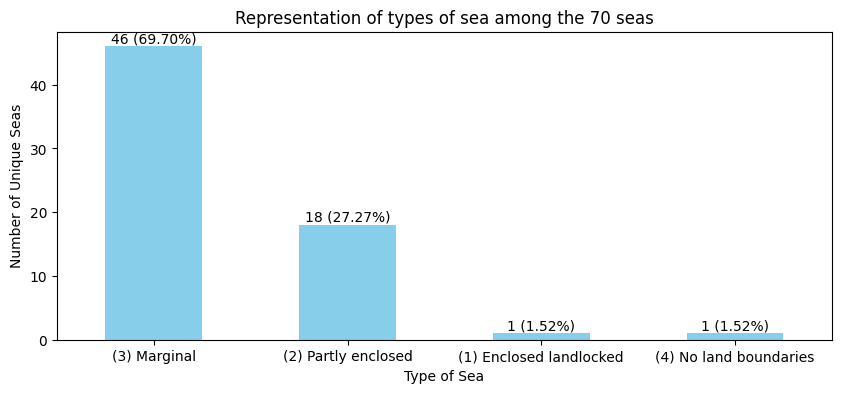

In [16]:
unique_seas = df.groupby('type of sea')['name'].nunique().sort_values(ascending=False)

percentages = (unique_seas / unique_seas.sum()) * 100

plt.figure(figsize=(10, 4))
unique_seas.plot(kind='bar', color='skyblue')
plt.xlabel('Type of Sea')
plt.ylabel('Number of Unique Seas')
plt.title(f'Representation of types of sea among the 70 seas')
plt.xticks(rotation=0)

ax = plt.gca()
type_mapping = {
    1: '(1) Enclosed landlocked',
    2: '(2) Partly enclosed',
    3: '(3) Marginal',
    4: '(4) No land boundaries'
}

ax.set_xticklabels([type_mapping.get(i, str(i)) for i in unique_seas.index])

for i, (v, p) in enumerate(zip(unique_seas, percentages)):
    plt.text(i, v + 0.1, f'{v} ({p:.2f}%)', ha='center', va='bottom')

plt.show()

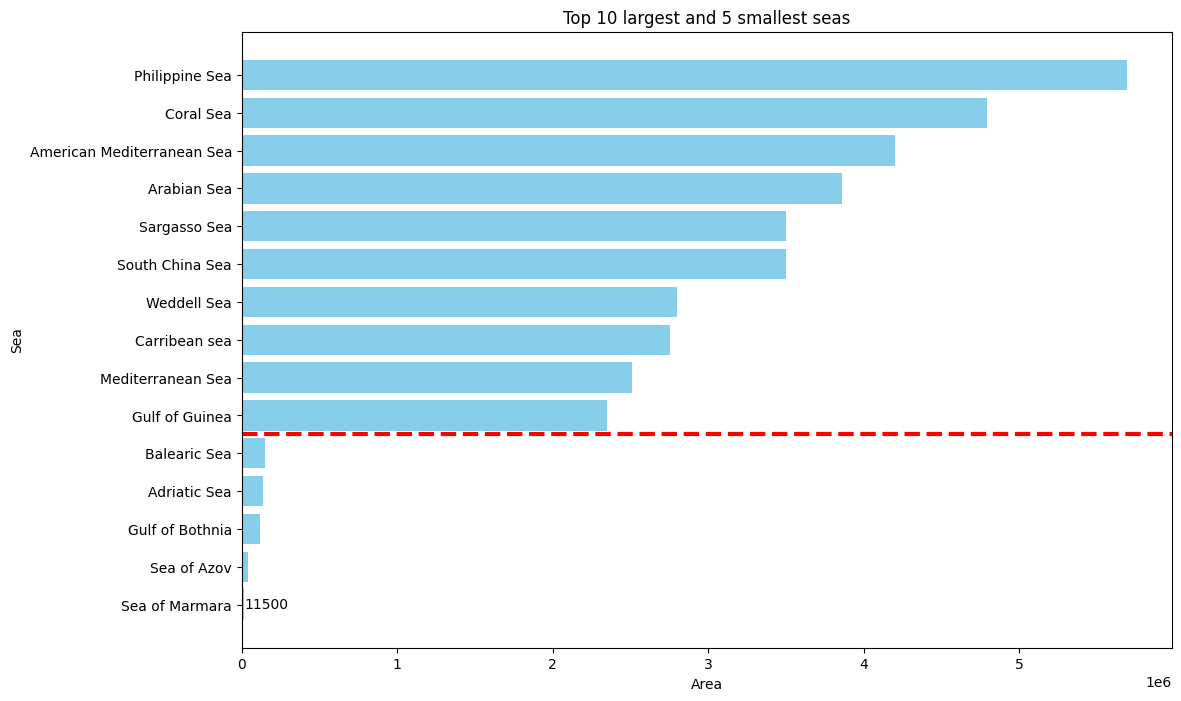

In [17]:
df_sea_areas = df.groupby('name', as_index=False).max().sort_values(by='area',ascending=False)

df_top_10_largest_sea = df_sea_areas.head(10)
df_top_10_smallest_sea = df_sea_areas.tail(5)

df_graph_sea_area = pd.concat([df_top_10_largest_sea, df_top_10_smallest_sea])

df_graph_sea_area = df_graph_sea_area.sort_values(by='area', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(df_graph_sea_area['name'], df_graph_sea_area['area'], color='skyblue')
plt.xlabel('Area')
plt.ylabel('Sea')
plt.title('Top 10 largest and 5 smallest seas')

sep_index = len(df_top_10_smallest_sea)
plt.axhline(y=sep_index - 0.5, color='red', linestyle='--', linewidth= 3)

min_area_value = df_graph_sea_area['area'].iloc[0]
min_area_name = df_graph_sea_area['name'].iloc[0]
plt.text(min_area_value + 5000, 0, f'{min_area_value}', va='center')

plt.show()

In [18]:
print(f"{df_graph_sea_area['name'].iloc[-1]} occupies the first position as the biggest sea with an area of {max(df_graph_sea_area['area'])} square kilometers and the smallest one is {df_graph_sea_area['name'].iloc[0]} ({min(df_graph_sea_area['area'])} square kilometers).")

Philippine Sea occupies the first position as the biggest sea with an area of 5695000 square kilometers and the smallest one is Sea of Marmara (11500 square kilometers).


## Temperature

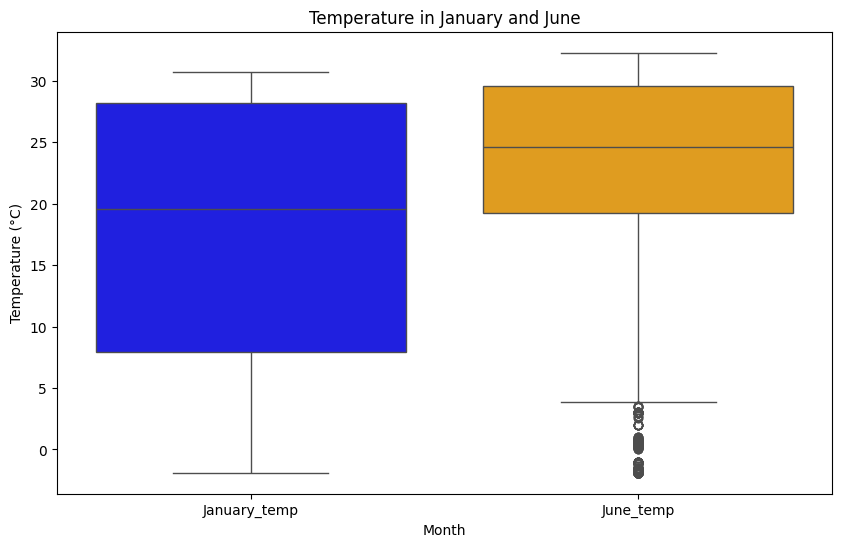

In [19]:
df_melted = df.melt(value_vars=['January_temp', 'June_temp'], var_name='Month', value_name='Temperature')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Temperature', data=df_melted, palette=['blue', 'orange'])
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in January and June')

plt.show()

This is a particular case where removing the June outliers is not applicable, as various regions of the world are being considered, and temperatures can vary to extremes values.

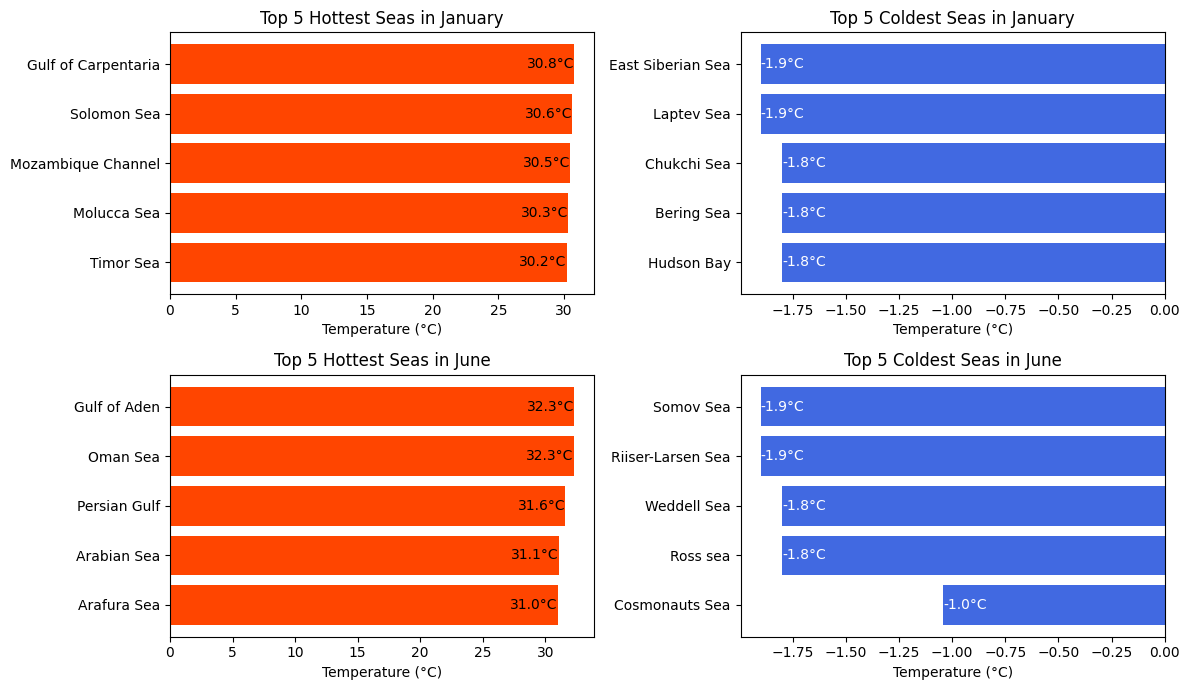

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

hottest_jan = df.groupby('name', as_index=False).max().sort_values(by='January_temp', ascending=False).head(5)
coldest_jan = df.groupby('name', as_index=False).max().sort_values(by='January_temp', ascending=False).tail(5)
hottest_june = df.groupby('name', as_index=False).max().sort_values(by='June_temp', ascending=False).head(5)
coldest_june = df.groupby('name', as_index=False).max().sort_values(by='June_temp', ascending=False).tail(5)

axs[0, 0].barh(hottest_jan['name'], hottest_jan['January_temp'], color='orangered')
axs[0, 0].set_title('Top 5 Hottest Seas in January')
axs[0, 0].set_xlabel('Temperature (°C)')
axs[0, 0].invert_yaxis()
for i, v in enumerate(hottest_jan['January_temp']):
    axs[0, 0].text(v, i, str(round(v,1))+'°C', color='black', va='center', horizontalalignment='right')

axs[0, 1].barh(coldest_jan['name'], coldest_jan['January_temp'], color='royalblue')
axs[0, 1].set_title('Top 5 Coldest Seas in January')
axs[0, 1].set_xlabel('Temperature (°C)')
for i, v in enumerate(coldest_jan['January_temp']):
    axs[0, 1].text(v, i, str(round(v,1))+'°C', color='white', va='center', horizontalalignment='left')

axs[1, 0].barh(hottest_june['name'], hottest_june['June_temp'], color='orangered')
axs[1, 0].set_title('Top 5 Hottest Seas in June')
axs[1, 0].set_xlabel('Temperature (°C)')
axs[1, 0].invert_yaxis()
for i, v in enumerate(hottest_june['June_temp']):
    axs[1, 0].text(v, i, str(round(v,1))+'°C', color='black', va='center', horizontalalignment='right')

axs[1, 1].barh(coldest_june['name'], coldest_june['June_temp'], color='royalblue')
axs[1, 1].set_title('Top 5 Coldest Seas in June')
axs[1, 1].set_xlabel('Temperature (°C)')
for i, v in enumerate(coldest_june['June_temp']):
    axs[1, 1].text(v, i, str(round(v,1))+'°C', color='white', va='center', horizontalalignment='left')

plt.tight_layout()
plt.show()

## Representation of target "corals" for each variable

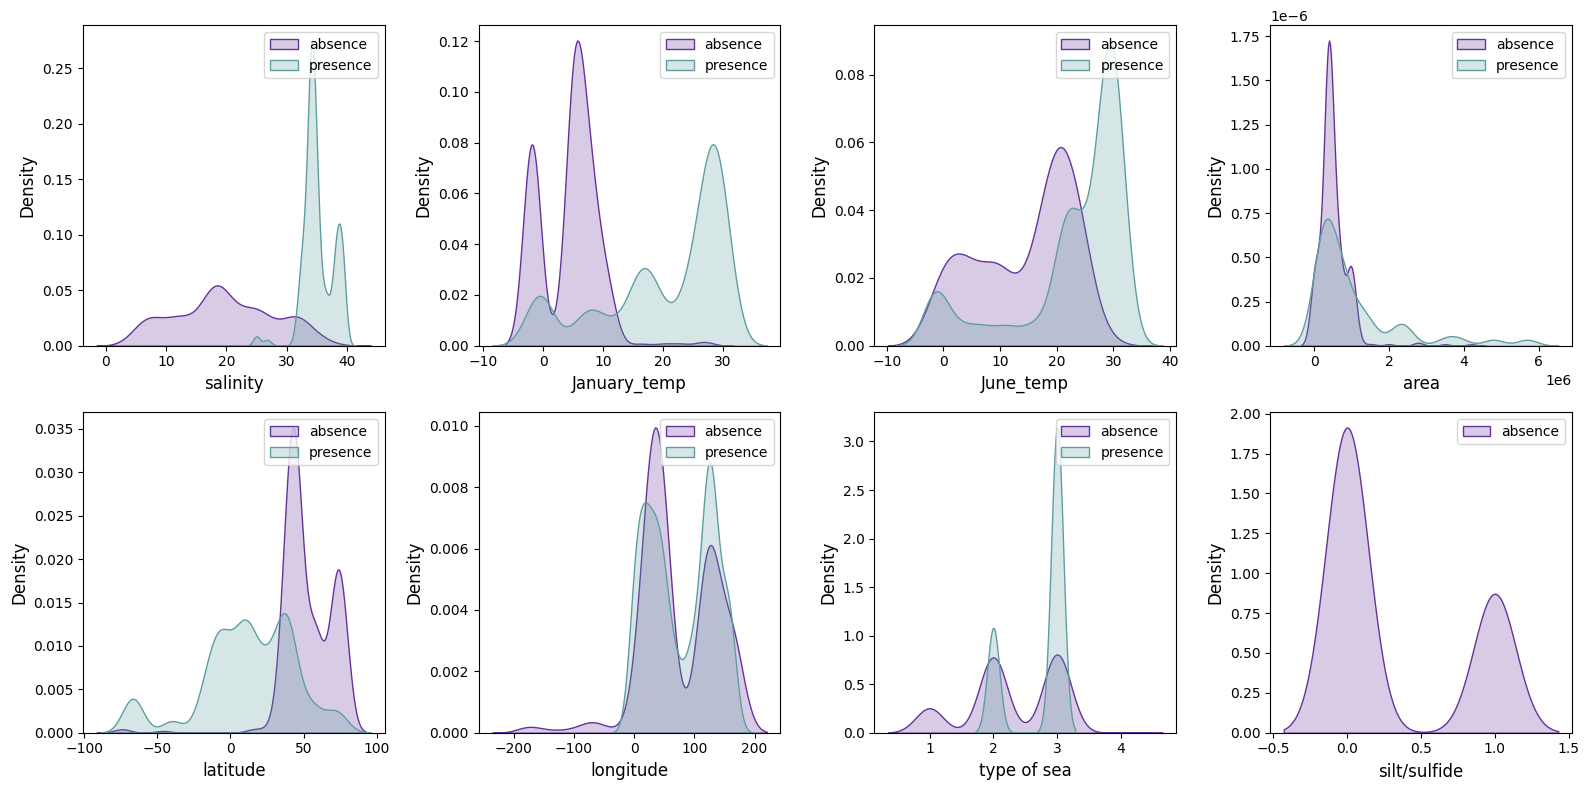

In [21]:
corals_0 = df[df['corals'] == 0]
corals_1 = df[df['corals'] == 1]

columns = ['salinity','January_temp','June_temp', 
            'area','latitude','longitude', 
            'type of sea','silt/sulfide']

num_plots = len(columns)
num_rows = num_plots // 4 + (num_plots % 4 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, num_rows*4))

for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax = sns.kdeplot(
        corals_0[column], 
        color='rebeccapurple', 
        label='absence', 
        fill=True, 
        ax=ax, 
        warn_singular=False
    )
    
    ax = sns.kdeplot(
        corals_1[column], 
        color='cadetblue', 
        label='presence', 
        fill=True, 
        ax=ax, 
        warn_singular=False
    )
    
    ax.legend()
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)

if num_plots < num_rows * 4:
    for i in range(num_plots, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()

- Salinity emerges as the most crucial factor in differentiating areas suitable for coral habitation from those where corals cannot thrive. This observation is supported not only by our dataset but also by scientific research, which highlights salinity as a critical factor for coral survival, particularly during times of global warming;

- The presence of silt or sulfide on the sea bottom or in the water makes coral existence impossible. This phenomenon is evident, for example, in the case of the Yellow Sea, where water is heavily laden with silt from rivers. Therefore, silt or sulfide content is a significant feature that characterizes only 'non-coral' areas;

- Enclosed landlocked seas mentioned in this dataset are not the dwellings for corals;

- Surprizingly, both January temperature and latitude (!) can play a role in distinguishing between 'coral' and 'non-coral' seas.

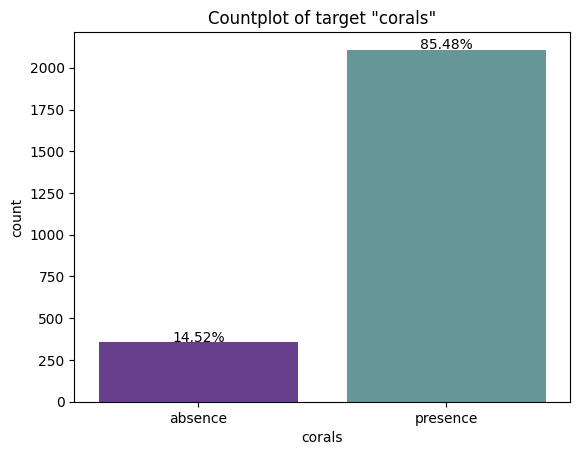

In [22]:
ax = sns.countplot(x='corals', data=df, palette=({'1':'cadetblue','0':'rebeccapurple'}))

total = len(df['corals'])

presence_mapping = {
    0: 'absence',
    1: 'presence'
}

ax.set_xticklabels([presence_mapping.get(i, str(i)) for i in df.index])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}%'.format((height / total) * 100), ha="center")

plt.title('Countplot of target "corals"')
plt.show()

Due to the target's imbalance, I will balance it later using the SMOTE method. When distinguishing the most important features by type ('coral' or 'non-coral'), it becomes evident that:

- 'non-coral' areas are characterized by narrow range of January temperatures and low salinity in majority of cases;
- in contrast, areas inhabited by corals show wide range of January temperatures and salinity not less than 24-25 PSU.

In [ ]:
f = folium.Figure(width=1200, height=600)

m = folium.Map(location=[41, 12], tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/Ocean/World_Ocean_Base/MapServer/tile/{z}/{y}/{x}',
               attr = 'Tiles &copy; Esri &mdash; Sources: GEBCO, NOAA, CHS, OSU, UNH, CSUMB, National Geographic, DeLorme, NAVTEQ, and Esri',
               zoom_start=2).add_to(f)

# Choose the colors for the markers
def color_maker(status):
    if status == 0:
        return 'purple'
    elif status == 1:
        return 'green'
    else:
        return 'black'
    
# Add markers with colors
for _, row in df.iterrows():
    status = row['corals']
    color = color_maker(status)
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
        '{}, salinity: {:.2f} PSU, silt/sulfide: {}, area: {} sq km, '
        'January temperature: {:.2f}°C, June temperature: {:.2f}°C'
        .format(
            row['name'],
            row['salinity'],
            row['silt/sulfide'],
            row['area'],
            row['January_temp'],
            row['June_temp']
            )
        ),
        icon=folium.Icon(icon = 'sun', prefix='fa', color=color)
    ).add_to(m)
    
# Legend
legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 160px; height: 100px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 opacity: 0.8;
                 ">
        
        <p><b><i class="fa fa-map-marker fa-1x" style="color: purple"></i> - Absence of corals<b></p>
        <p><i class="fa fa-map-marker fa-1x" style="color: green"></i> - Presence of corals</p>
        <p><i class="fa fa-map-marker fa-1x" style="color: black"></i> - No clear info</p>
    </div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

m

To iteract with the dynamic map, please check this notebook at .

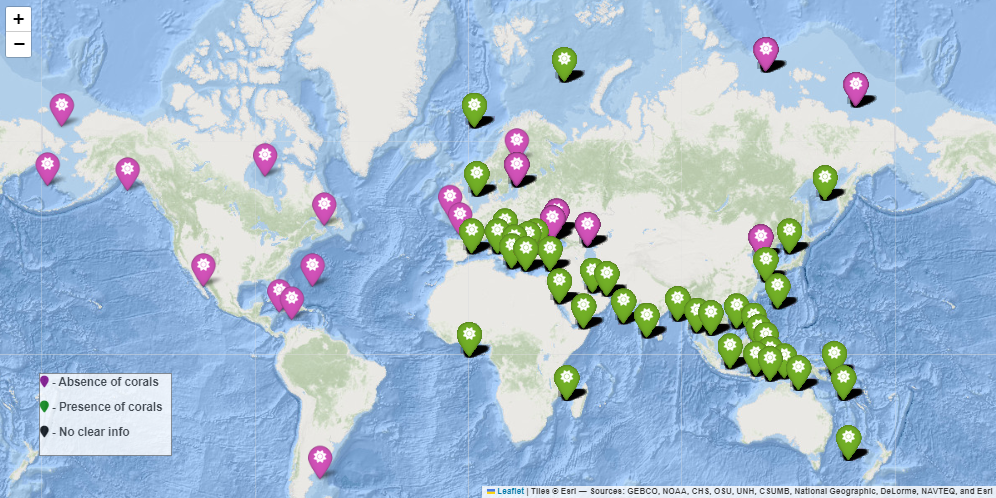

## Correlation

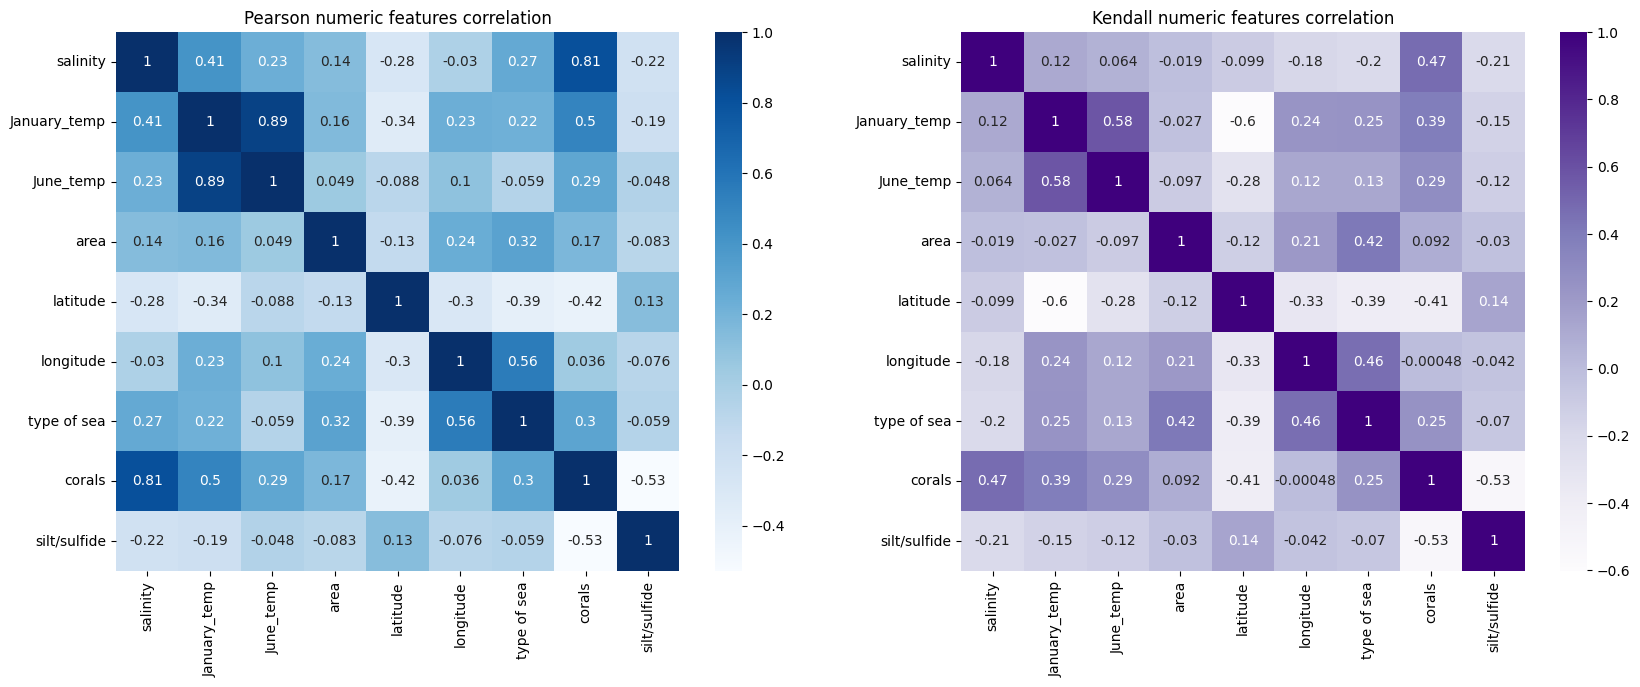

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

sns.heatmap(df.corr(), annot=True, cmap='Blues', ax=axs[0])
axs[0].set_title('Pearson numeric features correlation')

sns.heatmap(df.corr(method='kendall'), annot=True, cmap='Purples', ax=axs[1])
axs[1].set_title('Kendall numeric features correlation')

plt.show()

Considering the Pearson matrix, it is possible to see that the target value is strongly correlated with salinity of seas (0.81), temperatures in January (0.5), specification of bottom silt/sulfide (-0.53) and latitude (-0.42).